### Get faculty hiring data for cities and universities

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from postdocsalary.paths import DATA_DIR, ensure_dir
import urllib.request
pd.set_option('display.max_columns', None)
from postdocsalary.paths import save_fig, FIGURE_DIR

<ipython-input-2-57b724ca8b01>:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
university_df = pd.read_pickle(DATA_DIR/ 'university_ranking_salary.pickle')

In [4]:
#university_df_cols = ["National Rank", "Institution", "CBSA_NAME", "RPP_all"]

In [5]:
university_df[:20]

,World Rank,Institution,Country,National Rank,Quality of Education Rank,Alumni Employment Rank,Quality of Faculty Rank,Research Performance Rank,Score,UNITID,INSTNM,IALIAS,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,CHFTITLE,GENTELE,EIN,DUNS,OPEID,OPEFLAG,WEBADDR,ADMINURL,FAIDURL,APPLURL,NPRICURL,VETURL,ATHURL,DISAURL,SECTOR,ICLEVEL,CONTROL,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,DEGGRANT,HBCU,HOSPITAL,MEDICAL,TRIBAL,LOCALE,OPENPUBL,ACT,NEWID,DEATHYR,CLOSEDAT,CYACTIVE,POSTSEC,PSEFLAG,PSET4FLG,RPTMTH,INSTCAT,C18BASIC,C18IPUG,C18IPGRD,C18UGPRF,C18ENPRF,C18SZSET,C15BASIC,CCBASIC,CARNEGIE,LANDGRNT,INSTSIZE,F1SYSTYP,F1SYSNAM,F1SYSCOD,CBSA,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG,LONGITUDE,CBSA_NAME,dup,RPP_all,MEDIAN_SALARY,N_SALARIES,MEDIAN_SALARY_UPPER,MEDIAN_SALARY_LOWER,REAL_MEDIAN_SALARY,REAL_MEDIAN_SALARY_UPPER,REAL_MEDIAN_SALARY_LOWER
0,1.0,Harvard University,USA,1.0,1,1,1,1,100.0,166027.0,Harvard University,,Massachusetts Hall,Cambridge,MA,02138,25.0,1.0,Lawrence S. Bacow,President,6174951000,42103580.0,082359691|149617367|047006379,215500.0,1.0,www.harvard.edu/,college.harvard.edu/admissions,college.harvard.edu/financial-aid,college.harvard.edu/admissions/application-pro...,college.harvard.edu/financial-aid/net-price-ca...,sfs.harvard.edu/veteran-military-benefits,,accessibility.harvard.edu/,2.0,1.0,2.0,9.0,1.0,1.0,11.0,1.0,2.0,2.0,1.0,2.0,12.0,1.0,A,-2.0,-2.0,-2,1.0,1.0,1.0,1.0,1.0,2.0,15.0,8.0,14.0,14.0,6.0,17.0,15.0,15.0,15.0,2.0,5.0,2.0,-2,-2.0,14460,1,148,71650.0,25017,Middlesex County,2505.0,-71.118313,42.374471,96.0,1.0,-71.118313,"Boston-Cambridge-Newton, MA-NH",False,115.5,55783.941620,493,56164.312487,55205.642506,48297.784952,48627.110378,47797.093079
1,2.0,Massachusetts Institute of Technology,USA,2.0,4,12,2,8,96.7,166683.0,Massachusetts Institute of Technology,"MIT, M.I.T.",77 Massachusetts Avenue,Cambridge,MA,02139-4307,25.0,1.0,L. Rafael Reif,President,6172531000,42103594.0,001425594,217800.0,1.0,web.mit.edu/,https://mitadmissions.org/,https://sfs.mit.edu/,my.mit.edu/,https://sfs.mit.edu/undergraduate-students/our...,https://sfs.mit.edu/undergraduate-students/typ...,,studentlife.mit.edu/das,2.0,1.0,2.0,9.0,1.0,1.0,12.0,1.0,2.0,2.0,2.0,2.0,12.0,1.0,A,-2.0,-2.0,-2,1.0,1.0,1.0,1.0,1.0,2.0,15.0,14.0,15.0,14.0,6.0,17.0,15.0,15.0,15.0,1.0,4.0,2.0,-2,-2.0,14460,1,148,71650.0,25017,Middlesex County,2507.0,-71.093226,42.359243,96.0,1.0,-71.093226,"Boston-Cambridge-Newton, MA-NH",False,115.5,56659.816586,680,56950.613563,56164.312487,49056.118257,49307.890531,48627.110378
2,3.0,Stanford University,USA,3.0,10,4,3,2,95.1,243744.0,Stanford University,,,Stanford,CA,94305,6.0,8.0,Marc Tessier-Lavigne,President,6507232300,941156365.0,009214214,130500.0,1.0,www.stanford.edu/,admission.stanford.edu/,financialaid.stanford.edu/,commonapp.org/,www.stanford.edu/dept/finaid/undergrad/how/cal...,exploredegrees.stanford.edu/veterans/,parents.stanford.edu/2015/11/09/stanford-athle...,diversityandaccess.stanford.edu/disability-access,2.0,1.0,2.0,9.0,1.0,1.0,11.0,1.0,2.0,1.0,1.0,2.0,21.0,1.0,A,-2.0,-2.0,-2,1.0,1.0,1.0,1.0,1.0,2.0,15.0,11.0,14.0,14.0,6.0,17.0,15.0,15.0,15.0,2.0,4.0,2.0,-2,-2.0,41940,1,488,-2.0,6085,Santa Clara County,618.0,-122.167359,37.429434,96.0,1.0,-122.167359,"San Jose-Sunnyvale-Santa Clara, CA",False,126.7,62476.603840,349,63319.925605,62352.688787,49310.658122,49976.263303,49212.856186
3,6.0,Princeton University,USA,4.0,5,15,7,70,92.6,186131.0,Princeton University,,1 Nassau Hall,Princeton,NJ,08544-0070,34.0,2.0,Christopher L. Eisgruber,President,6092583000,210634501.0,002484665,262700.0,1.0,www.princeton.edu/,,,,www.princeton.edu/admission/financialaid/estim...,registrar.princeton.edu/student-services/veter...,fs.ncaa.org/Docs/newmedia/public/rates/index.html,www.princeton.edu/ods/,2.0,1.0,2.0,9.0,1.0,1.0,12.0,1.0,2.0,2.0,2.0,2.0,13.0,1.0,A,-2.0,-2.0,-2,1.0,1.0,1.0,1.0,1.0,2.0,15.0,11.0,15.0,14.0,5.0,14.0,15.0,15.0,15.0,2.0,3.0,2.0,-2,-2.0,45940,1,408,-2.0,34021,Mercer County,3412.0,-

### Hiring

In [6]:
Business_edgelist = pd.read_csv(DATA_DIR/ 'faculty_hiring'/ 'Business_edgelist.txt', sep='\t')
Business_vertexlist = pd.read_csv(DATA_DIR/ 'faculty_hiring'/ 'Business_vertexlist.txt', sep='\t')
ComputerScience_edgelist = pd.read_csv(DATA_DIR/ 'faculty_hiring'/ 'ComputerScience_edgelist.txt', sep='\t')
ComputerScience_vertexlist = pd.read_csv(DATA_DIR/ 'faculty_hiring'/ 'ComputerScience_vertexlist.txt', sep='\t')
History_edgelist = pd.read_csv(DATA_DIR/ 'faculty_hiring'/ 'History_edgelist.txt', sep='\t')
History_vertexlist = pd.read_csv(DATA_DIR/ 'faculty_hiring'/ 'History_vertexlist.txt', sep='\t')

In [7]:
len(History_vertexlist), len(ComputerScience_vertexlist), len(Business_vertexlist)

(145, 206, 113)

In [8]:
len(History_edgelist) + len(ComputerScience_edgelist) + len(History_edgelist)

14064

In [9]:
ComputerScience_vertexlist["Region  "].unique()

array(['West     ', 'Northeast', 'Midwest  ', 'South    ', 'Canada   ',
       'Earth    '], dtype=object)

In [10]:
match_dict = {
    "University of Michigan": "University of Michigan, Ann Arbor",
    "University of Wisconsin, Madison": "University of Wisconsin–Madison",
    "University of Minnesota, Minneapolis": "University of Minnesota, Twin Cities",
    "University of Illinois, Urbana Champaign": "University of Illinois at Urbana–Champaign",
    "Purdue University": "Purdue University, West Lafayette",
    "Ohio State University": "Ohio State University, Columbus",
    "University of North Carolina, Chapel Hill": "University of North Carolina at Chapel Hill",
    "Washington University, St. Louis": "Washington University in St. Louis",
    "University of Texas, Austin": "University of Texas at Austin",
    "University of Pittsburgh": "University of Pittsburgh - Pittsburgh Campus",
    "Pennsylvania State University": "Pennsylvania State University, University Park",
    "University of Washington": "University of Washington - Seattle",
    "Indiana University": "Indiana University",
    "University of Colorado, Boulder": "University of Colorado Boulder",
    "UC Irvine": "University of California, Irvine",
    "State University of New York, Buffalo": "University at Buffalo, The State University of New York",
    "University of Texas, Dallas": "University of Texas at Dallas",
    "University of Massachusetts, Amherst": "University of Massachusetts Amherst",
    "Texas A&M": "Texas A&M University, College Station",
    "Claremont Graduate University": "",
    "University of South Carolina": "University of South Carolina - Columbia",
    "University of Oklahoma": "University of Oklahoma - Norman Campus",
    "Rutgers University": "Rutgers University-New Brunswick",
    "University of Kansas, Lawrence": "University of Kansas",
    "Louisiana State University": "Louisiana State University - Baton Rouge",
    "University of Arkansas, Fayetteville": "University of Arkansas - Fayetteville",
    "University of Alabama, Tuscaloosa": "University of Alabama - Tuscaloosa",
    "Oklahoma State University": "Oklahoma State University–Stillwater",
    "State University of New York, Binghamton": "Binghamton University",
    "CUNY Baruch College": "",
    "University of Hawaii, Manoa": "University of Hawaii at Manoa",
    "University of Mississippi": "University of Mississippi - Oxford Campus",
    "University of Missouri, St. Louis": "University of Missouri–St. Louis",
    "Worcester Polytechnic Institute": "",
    "Fordham University": "",
    "Santa Clara University": "",
    "Rollins College": "",
    "Miami University, Ohio": "Miami University",
    "Bentley University": "",
    "Texas Christian University": "",
    "Abilene Christian University": "",
    "Babson College": "",
    "Pepperdine University": "",
    "Thunderbird School of Global Management": "",
    "DePaul University": "",
    "Hofstra University": "",
    "University of Toronto": "",
    "UC San Diego": "University of California, San Diego",
    "State University of New York, Stony Brook": "Stony Brook University",
    "University of British Columbia": "",
    "UC Santa Barbara": "University of California, Santa Barbara",
    "University of Waterloo": "",
    "McGill University": "",
    "CUNY Graduate Center": "",
    "University of Montreal": "",
    "Simon Fraser University": "",
    "University of Illinois, Chicago": "University of Illinois at Chicago",
    "Stevens Institute of Technology": "",
    "McMaster University": "",
    "University of Alberta": "",
    "Polytechnic Institute of NYU": "",
    "University of Calgary": "",
    "University of Louisiana, Lafayette": "",
    "University of Western Ontario": "",
    "Carleton University": "",
    "Queens University": "",
    "University of Wisconsin, Milwaukee": "University of Wisconsin–Milwaukee",
    "University of Texas, Arlington": "University of Texas at Arlington",
    "University of Ottawa": "",
    "Oregon Health and Science University": "Oregon Health & Science University",
    "State University of New York, Albany": "University at Albany, SUNY",
    "University of South Florida": "University of South Florida - Tampa",
    "Colorado State University": "Colorado State University - Fort Collins",
    "University of Colorado, Denver": "University of Colorado Denver",
    "Toyota Technological Institute at Chicago": "",
    "University of Manitoba": "",
    "University of Regina": "",
    "University of Nebraska, Lincoln": "University of Nebraska–Lincoln",
    "University of Saskatchewan": "",
    "University of Texas, San Antonio": "University of Texas at San Antonio",
    "Oakland University (Michigan)": "Oakland University",
    "University of Maine": "University of Maine, Orono",
    "University of Victoria": "",
    "Concordia University, Montreal": "",
    "University of Missouri, Kansas City": "University of Missouri–Kansas City",
    "University of Missouri, Columbia": "University of Missouri–Columbia",
    "Dalhousie University": "",
    "Worcester Polytechnic Institute": "",
    "University of Texas, El Paso": "University of Texas at El Paso",
    "Naval Postgraduate School": "",
    "University of Massachusetts, Boston": "University of Massachusetts Boston",
    "York University": "",
    "Southern Illinois University, Carbondale": "Southern Illinois University Carbondale",
    "Claremont Graduate University": "",
    "Catholic University of America": "",
    "University of Massachusetts, Lowell": "University of Massachusetts Lowell",
    "University of North Carolina, Charlotte": "University of North Carolina at Charlotte",
    "University of Alabama, Birmingham": "University of Alabama at Birmingham",
    "Santa Clara University": "",
    "Montana State University": "Montana State University - Bozeman",
    "University of New Brunswick": "",
    "Wright State University": "Wright State University - Dayton",
    "Western Michigan University": "",
    "University of Alabama, Huntsville": "University of Alabama in Huntsville",
    "University of Idaho, Moscow": "University of Idaho",
    "Texas Tech University": "Texas Tech University (TTU)",
    "University of Tulsa": "",
    "Long Island University": "",
    "University of Colorado, Colorado Springs": "",
    "Memorial University of Newfoundland": "",
    "DePaul University": "",
    "Nova Southeastern University": "",
    "University of Bridgeport": "",
    "University of Nebraska, Omaha": "University of Nebraska Omaha",
    "University of Arkansas, Little Rock": "",
    "New Mexico Institute of Mining and Technology": "",
    "All others": "",
}

##### CS

In [11]:
match_list = []
for idx, row in ComputerScience_vertexlist.iterrows():
    match = None
    if row.institution in match_dict.keys():
        match = match_dict[row.institution]
    else:
        if row.institution in university_df.Institution.values:
            match = row.institution
        else:
            for ai, alias_list in enumerate(university_df.IALIAS.values):
                if type(alias_list) == str:
                    alias_list = alias_list.split(', ')
                    if row.institution in alias_list:
                        match = university_df.Institution.values[ai]
                        #match = alias_list[alias_list == row.institution]
    if match in ["", None]:
        print('"' + row.institution+'":"",')
    match_list.append(match)
    #if row.institution == 'MIT':
    #    breakme
ComputerScience_vertexlist['institution_name'] = match_list

# merge
ComputerScience_vertexlist = ComputerScience_vertexlist[["# u", "institution_name"]].merge(
    university_df[university_df.Institution.isnull() == False][["National Rank", "Institution"]],
    left_on="institution_name",
    right_on="Institution",
)

# count n hires
n_hires = []
for vertex in ComputerScience_vertexlist["# u"].values:
    n_hires.append(np.sum(ComputerScience_edgelist["# u"].values == vertex))
ComputerScience_vertexlist['n_hires'] = n_hires

"University of Toronto":"",
"University of British Columbia":"",
"University of Waterloo":"",
"McGill University":"",
"CUNY Graduate Center":"",
"College of William and Mary":"",
"University of Montreal":"",
"Simon Fraser University":"",
"Stevens Institute of Technology":"",
"Washington State University, Pullman":"",
"McMaster University":"",
"University of Alberta":"",
"Polytechnic Institute of NYU":"",
"University of Calgary":"",
"University of Louisiana, Lafayette":"",
"University of Western Ontario":"",
"Carleton University":"",
"Queens University":"",
"University of Ottawa":"",
"Toyota Technological Institute at Chicago":"",
"University of Manitoba":"",
"University of Regina":"",
"University of Saskatchewan":"",
"University of Victoria":"",
"Concordia University, Montreal":"",
"Dalhousie University":"",
"Worcester Polytechnic Institute":"",
"Naval Postgraduate School":"",
"York University":"",
"Claremont Graduate University":"",
"Catholic University of America":"",
"Santa Clara Un

In [12]:
len(ComputerScience_vertexlist)

142

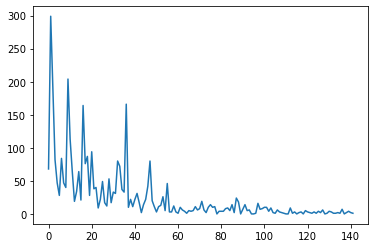

In [13]:
plt.plot(ComputerScience_vertexlist.sort_values(by='National Rank').n_hires.values)

#### History

In [14]:
match_list = []
for idx, row in Business_vertexlist.iterrows():
    match = None
    if row.institution in match_dict.keys():
        match = match_dict[row.institution]
    else:
        if row.institution in university_df.Institution.values:
            match = row.institution
        else:
            for ai, alias_list in enumerate(university_df.IALIAS.values):
                if type(alias_list) == str:
                    alias_list = alias_list.split(', ')
                    if row.institution in alias_list:
                        match = university_df.Institution.values[ai]
                        #match = alias_list[alias_list == row.institution]
    if match in ["", None]:
        print('"' + row.institution+'":"",')
    match_list.append(match)
Business_vertexlist['institution_name'] = match_list

# merge
Business_vertexlist = Business_vertexlist[["# u", "institution_name"]].merge(
    university_df[university_df.Institution.isnull() == False][["National Rank", "Institution"]],
    left_on="institution_name",
    right_on="Institution",
)

# count n hires
n_hires = []
for vertex in Business_vertexlist["# u"].values:
    n_hires.append(np.sum(Business_edgelist["# u"].values == vertex))
Business_vertexlist['n_hires'] = n_hires

"Claremont Graduate University":"",
"CUNY Baruch College":"",
"Worcester Polytechnic Institute":"",
"College of William and Mary":"",
"Fordham University":"",
"Santa Clara University":"",
"Rollins College":"",
"Bentley University":"",
"Texas Christian University":"",
"Abilene Christian University":"",
"Babson College":"",
"Pepperdine University":"",
"Thunderbird School of Global Management":"",
"DePaul University":"",
"Hofstra University":"",
"All others":"",


In [15]:
#[i for i in [j for j in university_df.Institution.values if type(j) == str] if "Minnesota" in i]

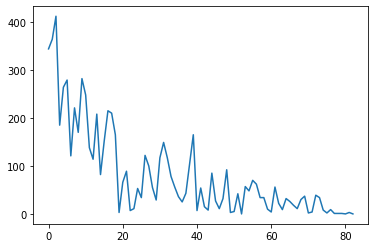

In [16]:
plt.plot(Business_vertexlist.sort_values(by='National Rank').n_hires.values)

In [17]:
#[i for i in [j for j in university_df.Institution.values if type(j) == str] if "New Mexico" in i]

### History

In [18]:
match_list = []
for idx, row in History_vertexlist.iterrows():
    match = None
    if row.institution in match_dict.keys():
        match = match_dict[row.institution]
    else:
        if row.institution in university_df.Institution.values:
            match = row.institution
        else:
            for ai, alias_list in enumerate(university_df.IALIAS.values):
                if type(alias_list) == str:
                    alias_list = alias_list.split(', ')
                    if row.institution in alias_list:
                        match = university_df.Institution.values[ai]
                        #match = alias_list[alias_list == row.institution]
    if match in ["", None]:
        print('"' + row.institution+'":"",')
    match_list.append(match)
History_vertexlist['institution_name'] = match_list
print(len(History_vertexlist))
# merge
History_vertexlist = History_vertexlist[["# u", "institution_name"]].merge(
    university_df[university_df.Institution.isnull() == False][["National Rank", "Institution"]],
    left_on="institution_name",
    right_on="Institution",
)
print(len(History_vertexlist))
# count n hires
n_hires = []
for vertex in History_vertexlist["# u"].values:
    n_hires.append(np.sum(History_edgelist["# u"].values == vertex))
History_vertexlist['n_hires'] = n_hires

"Catholic University of America":"",
"Claremont Graduate University":"",
"Princeton Theological Seminary":"",
"College of William and Mary":"",
"American University, Washington":"",
"CUNY Graduate Center":"",
"Washington State University, Pullman":"",
"Jewish Theological Seminary of America":"",
"Saint Johns University":"",
"Texas Christian University":"",
"Graduate Theological Union":"",
"Fordham University":"",
"Southern Baptist Theological Seminary":"",
"Western Michigan University":"",
"Middle Tennessee State University":"",
"All others":"",
145
115


In [19]:
History_vertexlist

,# u,institution_name,National Rank,Institution,n_hires
0,1,Harvard University,1.0,Harvard University,324
1,2,Yale University,8.0,Yale University,307
2,3,"University of California, Berkeley",10.0,"University of California, Berkeley",246
3,4,Princeton University,4.0,Princeton University,184
4,5,Stanford University,3.0,Stanford University,172
...,...,...,...,...,...
110,137,University of Texas at Arlington,151.0,University of Texas at Arlington,0
111,138,University of Idaho,181.0,University of Idaho,0
112,140,University of Memphis,215.0,University of Memphis,1
113,141,Mississippi State University,171.0,Mississippi State University,0


In [20]:
History_vertexlist.institution_name.values

array(['Harvard University', 'Yale University',
       'University of California, Berkeley', 'Princeton University',
       'Stanford University', 'University of Chicago',
       'Columbia University', 'Brandeis University',
       'Johns Hopkins University', 'University of Pennsylvania',
       'University of Wisconsin–Madison',
       'University of Michigan, Ann Arbor',
       'University of California, Los Angeles', 'Northwestern University',
       'Cornell University', 'Brown University',
       'University of California, Davis', 'University of Rochester',
       'New York University', 'University of California, San Diego',
       'Duke University', 'University of North Carolina at Chapel Hill',
       'University of Virginia', 'University of Southern California',
       'University of Washington - Seattle',
       'Massachusetts Institute of Technology',
       'University of Texas at Austin', 'Emory University',
       'Stony Brook University',
       'University of Illinois at

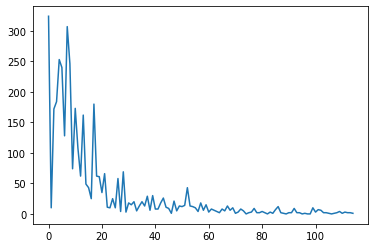

In [21]:
plt.plot(History_vertexlist.sort_values(by='National Rank').n_hires.values)

### Sort by number of hires

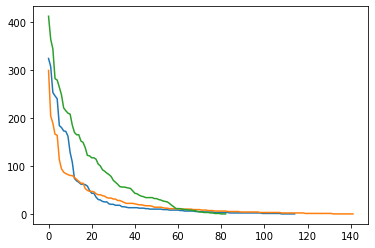

In [22]:
plt.plot(History_vertexlist.sort_values(by='n_hires', ascending=False).n_hires.values)
plt.plot(ComputerScience_vertexlist.sort_values(by='n_hires', ascending=False).n_hires.values)
plt.plot(Business_vertexlist.sort_values(by='n_hires', ascending=False).n_hires.values)

### Hiring rate for PhDs

In [23]:
joined_hires_df = (
    History_vertexlist[["Institution", "n_hires"]]
    .merge(
        ComputerScience_vertexlist[["Institution", "n_hires"]],
        on="Institution",
        how="outer",
        suffixes=("", "_CS"),
    )
    .merge(
        Business_vertexlist[["Institution", "n_hires"]],
        on="Institution",
        how="outer",
        suffixes=("_His", "_Bus"),
    )
)
joined_hires_df["total_hires"] = np.nansum(
    [
        joined_hires_df["n_hires_His"],
        joined_hires_df["n_hires_CS"],
        joined_hires_df["n_hires_Bus"],
    ],
    axis=0,
)
joined_hires_df = joined_hires_df.sort_values(by="total_hires", ascending=False)
joined_hires_df["prop_hires"] = joined_hires_df.total_hires.values / np.sum(
    joined_hires_df.total_hires.values
)

### Merge with survey dataframe, for number of students

In [24]:
survey_df = pd.read_pickle(DATA_DIR/ 'nsf_survey'/ 'phds_2013_simplified_counts.csv')

def strip_name(name):
    return ''.join(filter( lambda x: x in '0123456789abcdefghijklmnopqrstuvwxyz', name.lower()))

hand_matched = {
    "Stanford University": "Stanford University, Stanford ",
    "University of Chicago": "University Chicago ",
    "Columbia University": "Columbia University in the City of New York ",
    "University of Illinois at Urbana–Champaign": "University of Illinois, Urbana-Champaign ",
    "University of Texas at Austin": "University of Texas, Austin ",
    "University of North Carolina at Chapel Hill": "University of North Carolina, Chapel Hill ",
    "University of Rochester": "University Rochester ",
    "University of Southern California": "University Southern California ",
    "University of Virginia": "University of Virginia, Charlottesville ",
    "Washington University in St. Louis": "Washington University, St. Louis ",
    "University of Houston": "University Houston ",
    "University of Cincinnati": "University Cincinnati, Uptown West Campus ",
    "University of Connecticut": "University of Connecticut, Storrs ",
    "University of Notre Dame": "University Notre Dame ",
    "University of Texas at Dallas": "University of Texas, Dallas ",
    "Binghamton University": "SUNY, Binghamton University ",
    "Auburn University": "Auburn University, Auburn ",
    "University of Hawaii at Manoa": "University of Hawaii, Manoa ",
    "University of Miami": "University Miami ",
    "Stony Brook University": "SUNY, Stony Brook University ",
    "University of New Mexico": "University of New Mexico, Albuquerque ",
    "University of Illinois at Chicago": "University of Illinois, Chicago ",
    "Ohio University": "Ohio University, Chillicothe ",
    "University of Toledo": "University Toledo ",
    "University of New Hampshire": "University of New Hampshire, Durham ",
    "University at Albany, SUNY": "SUNY, University Albany ",
    "Kent State University": "Kent State University, Kent ",
    "Bowling Green State University": "Bowling Green State University, Bowling Green ",
    "University of Maine, Orono": "University of Maine ",
    "Miami University": "Miami University, Oxford ",
    "University of North Texas, Denton": "University North Texas, Denton ",
    "University of Southern Mississippi": "University Southern Mississippi ",
    "University of Akron": "University Akron, Akron ",
    "Saint Louis University": "St. Louis University ",
    "University of Texas at Arlington": "University of Texas, Arlington ",
    "University of Memphis": "University Memphis ",
    "Rensselaer Polytechnic Institute": "Rensselaer Polytechnic University, Troy ",
    "University of Central Florida": "University Central Florida ",
    "Oregon Health & Science University": "Oregon Health and Science University ",
    "Virginia Tech": "Virginia Polytechnic Institute and State University ",
    "Oregon State University": "Oregon State University, Corvallis ",
    "University of Texas at San Antonio": "University of Texas, San Antonio ",
    "University of Denver": "University Denver ",
    "New Mexico State University": "New Mexico State University, Las Cruces ",
    #"Virginia Commonwealth University": "University of Virginia",
    "University of Texas at El Paso": "University of Texas, El Paso ",
    "University of North Carolina at Charlotte": "University of North Carolina, Charlotte ",
    "University of Alabama at Birmingham": "University of Alabama, Birmingham ",
    "University of Alabama in Huntsville": "University of Alabama, Huntsville ",
    "Brigham Young University": "Brigham Young University, Provo ",
    "Utah State University": "Utah State University, Logan ",
    "University of Louisville": "University Louisville ",
    #'University of Virginia':'',
    #'Stony Brook University':'',
}

In [25]:
# fix hand matched
for key, value in hand_matched.items():
    survey_df.loc[survey_df.Institution == value, "Institution"] = key

survey_df['stripped_name'] = survey_df.Institution.apply(strip_name)
joined_hires_df['stripped_name'] = joined_hires_df.Institution.apply(strip_name)
len(joined_hires_df)

161

In [26]:
joined_hires_df = joined_hires_df.drop_duplicates()

len(joined_hires_df.drop_duplicates())

161

In [27]:
joined_hires_df_merged = joined_hires_df.merge(survey_df, on='stripped_name', how='left', suffixes=('', '_nsf_name'))
#joined_hires_df_merged['hire_ratio'] = joined_hires_df_merged['total_hires'] / joined_hires_df_merged['n_grads']
joined_hires_df_merged['prop_grads'] = joined_hires_df_merged['n_grads'] / joined_hires_df_merged['n_grads'].sum()
joined_hires_df_merged['hire_ratio'] = joined_hires_df_merged['prop_hires'] / joined_hires_df_merged['prop_grads']
joined_hires_df_merged = joined_hires_df_merged.sort_values(by='hire_ratio', ascending=False)
joined_hires_df_merged

,Institution,n_hires_His,n_hires_CS,n_hires_Bus,total_hires,prop_hires,stripped_name,Institution_nsf_name,n_grads,prop_grads,hire_ratio
4,University of Chicago,240.0,28.0,264.0,532.0,0.038367,universityofchicago,University of Chicago,412.0,0.010466,3.665933
8,Yale University,307.0,47.0,121.0,475.0,0.034256,yaleuniversity,Yale University,393.0,0.009983,3.431398
2,Massachusetts Institute of Technology,10.0,299.0,364.0,673.0,0.048536,massachusettsinstituteoftechnology,Massachusetts Institute of Technology,587.0,0.014911,3.254970
6,University of Pennsylvania,128.0,84.0,279.0,491.0,0.035410,universityofpennsylvania,University of Pennsylvania,443.0,0.011253,3.146646
1,Harvard University,324.0,68.0,344.0,736.0,0.053079,harvarduniversity,Harvard University,674.0,0.017121,3.100188
...,...,...,...,...,...,...,...,...,...,...,...
156,University of Massachusetts Boston,NaN,0.0,NaN,0.0,0.000000,universityofmassachusettsboston,"University of Massachusetts, Boston",26.0,0.000660,0.000000
157,University of Louisville,NaN,0.0,NaN,0.0,0.000000,universityoflouisville,University of Louisville,134.0,0.003404,0.000000
158,"University of Nevada, Reno",0.0,0.0,NaN,0.0,0.000000,universityofnevadareno,"University of Nevada, Reno",113.0,0.002870,0.000000
159,Wake Forest University,NaN,NaN,0.0,0.0,0.000000,wakeforestuniversity,Wake Forest University,48.0,0.001219,0.000000


In [28]:
joined_hires_df_merged.total_hires.sum()

13866.0

### Merge with university info

In [29]:
joined_hires_df = joined_hires_df_merged.merge(university_df, on="Institution")

In [30]:
joined_hires_df[:10]

,Institution,n_hires_His,n_hires_CS,n_hires_Bus,total_hires,prop_hires,stripped_name,Institution_nsf_name,n_grads,prop_grads,hire_ratio,World Rank,Country,National Rank,Quality of Education Rank,Alumni Employment Rank,Quality of Faculty Rank,Research Performance Rank,Score,UNITID,INSTNM,IALIAS,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,CHFTITLE,GENTELE,EIN,DUNS,OPEID,OPEFLAG,WEBADDR,ADMINURL,FAIDURL,APPLURL,NPRICURL,VETURL,ATHURL,DISAURL,SECTOR,ICLEVEL,CONTROL,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,DEGGRANT,HBCU,HOSPITAL,MEDICAL,TRIBAL,LOCALE,OPENPUBL,ACT,NEWID,DEATHYR,CLOSEDAT,CYACTIVE,POSTSEC,PSEFLAG,PSET4FLG,RPTMTH,INSTCAT,C18BASIC,C18IPUG,C18IPGRD,C18UGPRF,C18ENPRF,C18SZSET,C15BASIC,CCBASIC,CARNEGIE,LANDGRNT,INSTSIZE,F1SYSTYP,F1SYSNAM,F1SYSCOD,CBSA,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG,LONGITUDE,CBSA_NAME,dup,RPP_all,MEDIAN_SALARY,N_SALARIES,MEDIAN_SALARY_UPPER,MEDIAN_SALARY_LOWER,REAL_MEDIAN_SALARY,REAL_MEDIAN_SALARY_UPPER,REAL_MEDIAN_SALARY_LOWER
0,University of Chicago,240.0,28.0,264.0,532.0,0.038367,universityofchicago,University of Chicago,412.0,0.010466,3.665933,8.0,USA,6.0,8,16,27,22,91.5,144050.0,University of Chicago,,5801 S Ellis Ave,Chicago,IL,60637,17.0,3.0,Robert J. Zimmer,President,7737021234,362177139.0,005421136,177400.0,1.0,www.uchicago.edu/,collegeadmissions.uchicago.edu/,financialaid.uchicago.edu/,https://collegeadmissions.uchicago.edu/apply/,https://collegeadmissions.uchicago.edu/costs/c...,https://registrar.uchicago.edu/records/veteran...,,disabilities.uchicago.edu/,2.0,1.0,2.0,9.0,1.0,1.0,11.0,1.0,2.0,2.0,1.0,2.0,11.0,1.0,A,-2.0,-2.0,-2,1.0,1.0,1.0,1.0,1.0,2.0,15.0,8.0,14.0,14.0,6.0,17.0,15.0,15.0,15.0,2.0,4.0,2.0,-2,-2.0,16980,1,176,-2.0,17031,Cook County,1701.0,-87.599539,41.787994,96.0,1.0,-87.599539,"Chicago-Naperville-Elgin, IL-IN-WI",False,102.8,57765.712798,699,59366.358609,56987.933045,56192.327624,57749.376079,55435.732534
1,Yale University,307.0,47.0,121.0,475.0,0.034256,yaleuniversity,Yale University,393.0,0.009983,3.431398,10.0,USA,8.0,6,36,13,20,90.7,130794.0,Yale University,,Woodbridge Hall,New Haven,CT,06520,9.0,1.0,Peter Salovey,President,2034324771,60646973.0,043207562,142600.0,1.0,https://www.yale.edu/,https://admissions.yale.edu/,https://finaid.yale.edu/,https://admissions.yale.edu/first-year-applica...,https://admissions.yale.edu/estimate-your-cost,finaid.yale.edu/costs-affordability/types-aid/...,yalebulldogs.com/documents/2019/7/18//Athletic...,https://sas.yale.edu/,2.0,1.0,2.0,9.0,1.0,1.0,11.0,1.0,2.0,2.0,1.0,2.0,12.0,1.0,A,-2.0,-2.0,-2,1.0,1.0,1.0,1.0,1.0,2.0,15.0,8.0,14.0,14.0,6.0,17.0,15.0,15.0,15.0,2.0,4.0,2.0,-2,-2.0,35300,1,408,75700.0,9009,New Haven County,903.0,-72.926688,41.311158,96.0,1.0,-72.926688,"New Haven-Milford, CT",False,106.2,53631.976988,583,54242.856101,53165.480709,50500.919951,51076.135688,50061.657918
2,Massachusetts Institute of Technology,10.0,299.0,364.0,673.0,0.048536,massachusettsinstituteoftechnology,Massachusetts Institute of Technology,587.0,0.014911,3.254970,2.0,USA,2.0,4,12,2,8,96.7,166683.0,Massachusetts Institute of Technology,"MIT, M.I.T.",77 Massachusetts Avenue,Cambridge,MA,02139-4307,25.0,1.0,L. Rafael Reif,President,6172531000,42103594.0,001425594,217800.0,1.0,web.mit.edu/,https://mitadmissions.org/,https://sfs.mit.edu/,my.mit.edu/,https://sfs.mit.edu/undergraduate-students/our...,https://sfs.mit.edu/undergraduate-students/typ...,,studentlife.mit.edu/das,2.0,1.0,2.0,9.0,1.0,1.0,12.0,1.0,2.0,2.0,2.0,2.0,12.0,1.0,A,-2.0,-2.0,-2,1.0,1.0,1.0,1.0,1.0,2.0,15.0,14.0,15.0,14.0,6.0,17.0,15.0,15.0,15.0,1.0,4.0,2.0,-2,-2.0,14460,1,148,71650.0,25017,Middlesex County,2507.0,-71.093226,42.359243,96.0,1.0,-71.093226,"Boston-Cambridge-Newton, MA-NH",False,115.5,56659.816586,680,56950.613563,56164.312487,49056.118257,49307.890531,48627.110378
3,University of Pennsylvania,128.0,84.0,279.0,491.0,0.035410,universityofpennsylvania,University of Pennsylvania,443.0,0.011253,3.146646,9.0,USA,7.0,14,10,42,12,91.1,215062.0,Universi

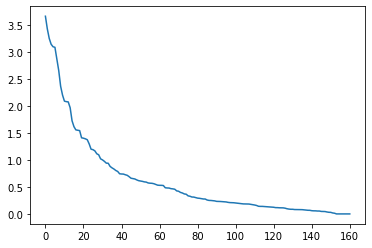

In [31]:
plt.plot(joined_hires_df.hire_ratio.values)

In [32]:
joined_hires_df.to_pickle(DATA_DIR / 'university_salary_hiring.pickle')

In [33]:
len(joined_hires_df)

161

### Get hires by CBSA

In [34]:
CBSA_df = pd.DataFrame(
    [
        [i, joined_hires_df[joined_hires_df.CBSA_NAME == i].RPP_all.values[0]]
        for i in joined_hires_df.CBSA_NAME.unique()
    ],
    columns=["CBSA_NAME", "RPP_all"],
)
CBSA_df = CBSA_df.sort_values(by='RPP_all', ascending=False)
CBSA_df[:5]

,CBSA_NAME,RPP_all
8,"San Francisco-Oakland-Berkeley, CA",134.5
5,"San Jose-Sunnyvale-Santa Clara, CA",126.7
6,"New York-Newark-Jersey City, NY-NJ-PA",125.7
74,"Urban Honolulu, HI",123.8
73,"Santa Cruz-Watsonville, CA",122.7


In [35]:
total_hires_list = []
n_uni_list = []
n_grad_list = []
for idx, row in CBSA_df.iterrows():
    unis = joined_hires_df[joined_hires_df.CBSA_NAME == row.CBSA_NAME]
    n_uni_list.append(len(unis))
    total_hires_list.append(unis.total_hires.sum())
    n_grad_list.append(unis.n_grads.sum())
CBSA_df['total_hires'] = total_hires_list
CBSA_df['prop_hires'] = CBSA_df.total_hires.values / np.sum(CBSA_df.total_hires.values)
CBSA_df['n_uni'] = n_uni_list
CBSA_df['n_grad'] = n_grad_list
CBSA_df['prop_grad'] = CBSA_df.n_grad.values / np.sum(CBSA_df.n_grad.values)
CBSA_df = CBSA_df.sort_values(by="total_hires", ascending=False)
CBSA_df['cum_grad'] = np.cumsum(CBSA_df['prop_grad'])
CBSA_df['cum_hires'] = np.cumsum(CBSA_df['prop_hires'])

In [36]:
CBSA_df['hiring_grad_disparity'] = CBSA_df['prop_hires'].values / CBSA_df['prop_grad'].values

In [37]:
CBSA_df[:10]

,CBSA_NAME,RPP_all,total_hires,prop_hires,n_uni,n_grad,prop_grad,cum_grad,cum_hires,hiring_grad_disparity
2,"Boston-Cambridge-Newton, MA-NH",115.5,1604.0,0.115679,10,2325.0,0.059061,0.059061,0.115679,1.958626
0,"Chicago-Naperville-Elgin, IL-IN-WI",102.8,919.0,0.066277,6,1506.0,0.038256,0.097317,0.181956,1.732450
6,"New York-Newark-Jersey City, NY-NJ-PA",125.7,854.0,0.061589,5,1268.0,0.032211,0.129528,0.243545,1.912092
5,"San Jose-Sunnyvale-Santa Clara, CA",126.7,773.0,0.055748,1,763.0,0.019382,0.148910,0.299293,2.876240
8,"San Francisco-Oakland-Berkeley, CA",134.5,671.0,0.048392,1,911.0,0.023142,0.172052,0.347685,2.091097
16,"Los Angeles-Long Beach-Anaheim, CA",118.8,633.0,0.045651,4,1859.0,0.047223,0.219276,0.393336,0.966706
3,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",105.3,552.0,0.039810,4,990.0,0.025149,0.244424,0.433146,1.582975
11,"Ann Arbor, MI",100.6,519.0,0.037430,1,853.0,0.021668,0.266093,0.470576,1.727382
1,"New Haven-Milford, CT",106.2,475.0,0.034256,1,393.0,0.009983,0.276076,0.504832,3.431398
14,"Durham-Chapel Hill, NC",94.8,455.0,0.032814,2,866.0,0.021999,0.298074,0.537646,1.491639


In [38]:
CBSA_df.total_hires.sum()

13866.0

In [39]:
History_vertexlist.n_hires.sum() + ComputerScience_vertexlist.n_hires.sum() + Business_vertexlist.n_hires.sum()

13866

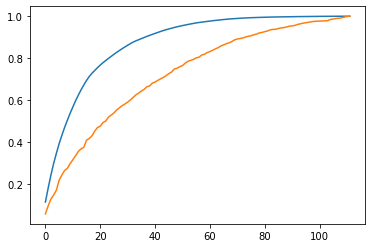

In [40]:
plt.plot(CBSA_df['cum_hires'].values)
plt.plot(CBSA_df['cum_grad'].values)

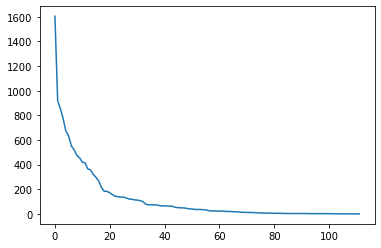

In [41]:
plt.plot(CBSA_df['total_hires'].values)

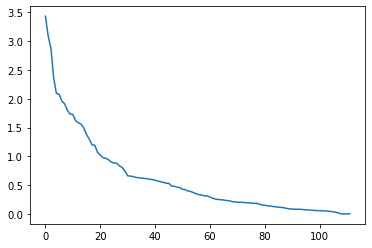

In [42]:
plt.plot(CBSA_df.sort_values(by="hiring_grad_disparity", ascending=False)['hiring_grad_disparity'].values)


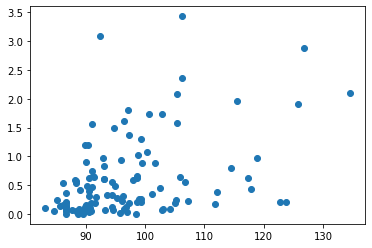

In [43]:
plt.scatter(
    CBSA_df.sort_values(by="hiring_grad_disparity", ascending=False)["RPP_all"].values,
    CBSA_df.sort_values(by="hiring_grad_disparity", ascending=False)[
        "hiring_grad_disparity"
    ].values,
)

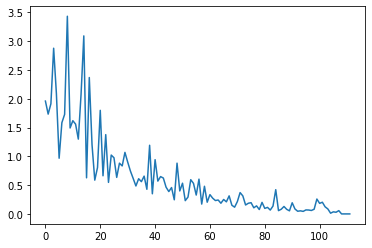

In [44]:
plt.plot(CBSA_df['hiring_grad_disparity'].values)

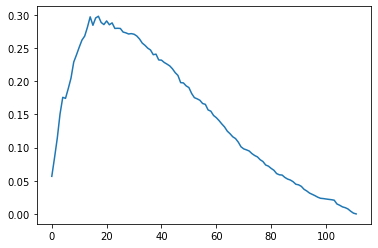

In [45]:
plt.plot(CBSA_df['cum_hires'].values - CBSA_df['cum_grad'].values)

(1, 10000)

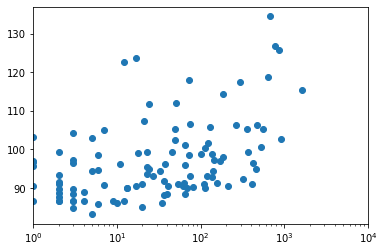

In [46]:
fig, ax = plt.subplots()
ax.scatter(CBSA_df.total_hires.values, CBSA_df.RPP_all.values)
ax.set_xscale('log')
ax.set_xlim([1, 10000])

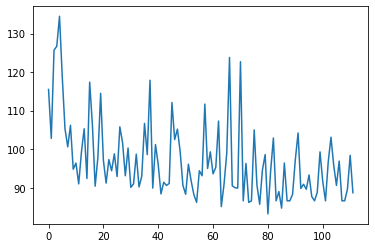

In [47]:
plt.plot(CBSA_df.RPP_all.values)

In [48]:
CBSA_df.to_pickle(DATA_DIR / 'city_hiring.pickle')

In [49]:
import seaborn as sns

In [50]:
pal = sns.color_palette('Set1', 10)
pal

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6),
 (0.8941176470588236, 0.10196078431372549, 0.10980392156862745)]

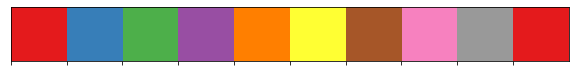

In [51]:
sns.palplot(pal)

In [52]:
CBSA_df[:3]

,CBSA_NAME,RPP_all,total_hires,prop_hires,n_uni,n_grad,prop_grad,cum_grad,cum_hires,hiring_grad_disparity
2,"Boston-Cambridge-Newton, MA-NH",115.5,1604.0,0.115679,10,2325.0,0.059061,0.059061,0.115679,1.958626
0,"Chicago-Naperville-Elgin, IL-IN-WI",102.8,919.0,0.066277,6,1506.0,0.038256,0.097317,0.181956,1.732450
6,"New York-Newark-Jersey City, NY-NJ-PA",125.7,854.0,0.061589,5,1268.0,0.032211,0.129528,0.243545,1.912092


In [53]:
CBSA_df.total_hires.sum()

13866.0